# Loading the Office Supplies data in my workspace


In [60]:
import pandas as pd

file_path = 'P2- OfficeSupplies Data.csv'
df = pd.read_csv(file_path)
print(df)

    OrderDate   Region      Rep     Item  Units  Unit Price
0   04-Jul-14     East  Richard  Pen Set     62        4.99
1   12-Jul-14     East     Nick   Binder     29        1.99
2   21-Jul-14  Central   Morgan  Pen Set     55       12.49
3   29-Jul-14     East    Susan   Binder     81       19.99
4   07-Aug-14  Central  Matthew  Pen Set     42       23.95
5   15-Aug-14     East  Richard   Pencil     35        4.99
6   24-Aug-14     West    James     Desk      3      275.00
7   01-Sep-14  Central    Smith     Desk      2      125.00
8   10-Sep-14  Central     Bill   Pencil      7        1.29
9   18-Sep-14     East  Richard  Pen Set     16       15.99
10  27-Sep-14     West    James      Pen     76        1.99
11  05-Oct-14  Central   Morgan   Binder     28        8.99
12  14-Oct-14     West   Thomas   Binder     57       19.99
13  22-Oct-14     East  Richard      Pen     64        8.99
14  31-Oct-14  Central   Rachel   Pencil     14        1.29
15  08-Nov-14     East    Susan      Pen

## Sales Analysis

### Total sales for each product category

In [64]:
Item = df['Item']
Units = df['Units']
Unit_Price = df['Unit Price']

df['Total Sales'] = Units * Unit_Price

total_sales_per_category = df.groupby('Item')['Total Sales'].sum()
total_sales_per_category = total_sales_per_category.sort_values(ascending=False)
print(total_sales_per_category)

Item
Binder     9577.65
Pen Set    4169.87
Pencil     2135.14
Pen        2045.22
Desk       1700.00
Name: Total Sales, dtype: float64


### To find the highest total sale category

In [45]:
max_category = None
max_sales = -1 # as starting with a low umber that is guranteed to be lower
# than any other number

for category, sales  in total_sales_per_category.items():
    if sales > max_sales:
        max_sales = sales
        max_category = category

print(f"The category '{max_category}' has the highest sales with a total of ₹{max_sales}")

The category 'Binder' has the highest sales with a total of ₹9577.65


### Identifying the top 10 best selling products

In [56]:
df_sorted = df.sort_values(by='Total Sales', ascending=False)

top_10_sales = df_sorted.head(10)
print("Top 10 highest-selling products:")
print(top_10_sales[['Item', 'Units', 'Unit Price', 'Total Sales']])

Top 10 highest-selling products:
       Item  Units  Unit Price  Total Sales
18   Binder     94       19.99      1879.06
3    Binder     81       19.99      1619.19
25   Binder     87       15.00      1305.00
21  Pen Set     74       15.99      1183.26
12   Binder     57       19.99      1139.43
4   Pen Set     42       23.95      1005.90
24   Binder     50       19.99       999.50
6      Desk      3      275.00       825.00
39   Binder     80        8.99       719.20
2   Pen Set     55       12.49       686.95


# Customer Analysis

### What are the top 10 customers by sale.

In [67]:
top_10_sales['Rep']

18       Alex
3       Susan
25      Smith
21      Susan
12     Thomas
4     Matthew
24    Matthew
6       James
39       Bill
2      Morgan
Name: Rep, dtype: object

### Total number of Unique customers

In [93]:
import pandas as pd

file_path = 'P2- OfficeSupplies Data.csv'
df = pd.read_csv(file_path)
Item = df['Item']
Units = df['Units']
Unit_Price = df['Unit Price']

df['Total Sales'] = Units * Unit_Price

unique_customers = df.groupby('Rep')['Total Sales'].sum()
print(len(unique_customers))

11


### Analysing customer purchase frequency 

In [99]:
purchase_frequency = df.groupby('Rep')['Units'].sum()
grouped  = df.groupby('Rep').agg({
    'Units': 'sum',
    'Total Sales': 'sum',
    'Item': lambda x: ', '.join(x)
}).reset_index()
print(grouped)

        Rep  Units  Total Sales  \
0      Alex    281      2812.19   
1      Bill    213      1749.87   
2     James    142      1283.61   
3   Matthew    193      3109.44   
4    Morgan    173      1387.77   
5      Nick    125       536.75   
6    Rachel    183       438.37   
7   Richard    396      2363.04   
8     Smith    156      1641.43   
9     Susan    170      3102.30   
10   Thomas     89      1203.11   

                                                 Item  
0             Binder, Binder, Pencil, Pen Set, Pencil  
1                 Pencil, Binder, Pen, Pencil, Binder  
2                           Desk, Pen, Binder, Pencil  
3                      Pen Set, Pen Set, Binder, Desk  
4                             Pen Set, Binder, Pencil  
5                                         Binder, Pen  
6                      Pencil, Binder, Pencil, Pencil  
7   Pen Set, Pencil, Pen Set, Pen, Pencil, Binder,...  
8                                Desk, Pencil, Binder  
9                  

# Time series analysis

### The month sales trend over the past year

In [108]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d-%b-%y')
df['Month'] = df['OrderDate'].dt.month
monthly_sales = df.groupby('Month')['Total Sales'].sum()
print(monthly_sales)

Month
1     1602.09
2     2044.33
3      556.87
4     1059.03
5     1300.35
6     1613.50
7     2673.23
8     2005.55
9      666.11
10    1984.57
11     833.78
12    3288.47
Name: Total Sales, dtype: float64


### Seosonal patterns in the sales data.

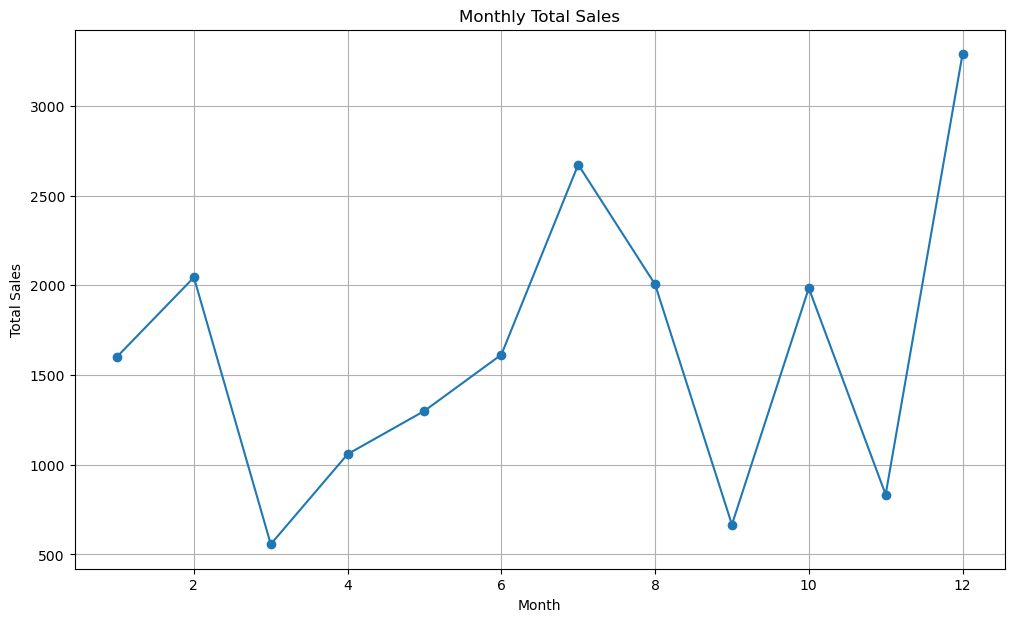

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(monthly_sales, marker='o', linestyle='-')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# Geographical Analysis

### Regions that generate the most sales

In [120]:
Region = df.groupby('Region')['Total Sales'].sum()
print(Region)

Region
Central    11139.07
East        6002.09
West        2486.72
Name: Total Sales, dtype: float64


 The region that generates the most sales is Central: 11139.07


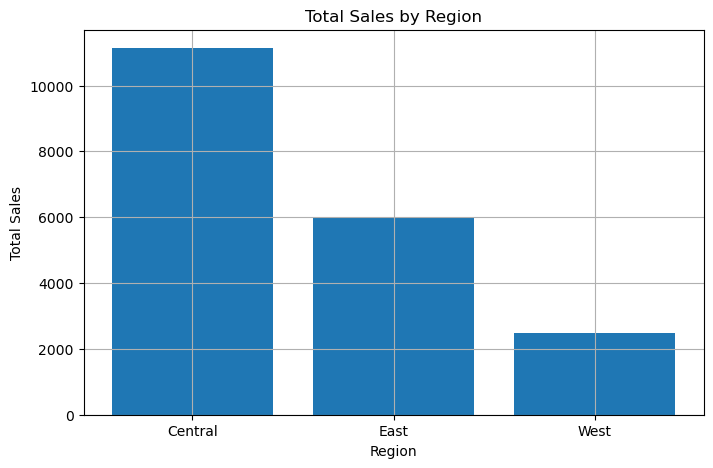

In [132]:
max_sales = -1
max_category = None

for category, sales in Region.items():
    if (sales > max_sales):
        max_sales = sales
        max_category = category

print(f" The region that generates the most sales is {max_category}: {max_sales}")
region_sales = df.groupby('Region')['Total Sales'].sum()

plt.figure(figsize=(8, 5))
plt.bar(region_sales.index, region_sales.values)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.grid(True)


## Profit Analysis

### Total profit for each product category

In [22]:
# well as i don't see any profit percentage or the original cost of the 
# product i am going to assume a profit percentage on each product category.

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'P2- OfficeSupplies Data.csv'
df = pd.read_csv(file_path)
Item = df['Item']
Units = df['Units']
Unit_Price = df['Unit Price']

df['Total Sales'] = Units * Unit_Price

profit_percentage = {
    'Binder': 10,
    'Pen Set': 30,
    'Pencil': 40,
    'Desk': 12,
    'Pen': 35,
}
df['Profit'] = 0.0

for i in range(len(df)):
    item = df.at[i, 'Item']  # Get the item for the current row
    total_sales = df.at[i, 'Total Sales']  # Get the total sales for the current row
    profit_pct = profit_percentage[item]  # Get the profit percentage for the item
    df.at[i, 'Profit'] = total_sales * (profit_pct / 100) 

total_profit_per_category = df.groupby('Item')['Profit'].sum()
print(total_profit_per_category)

Item
Binder      957.765
Desk        204.000
Pen         715.827
Pen Set    1250.961
Pencil      854.056
Name: Profit, dtype: float64


### Identifying the top 10 most profitable products

In [17]:

total_sales_per_category = df.groupby('Item')['Total Sales'].sum()
total_sales_per_category = total_sales_per_category.sort_values(ascending=False)


top_10_profitable_products = df['Profit'].sort_values(ascending=False)[:10]
print(top_10_profitable_products)

21    354.9780
4     301.7700
2     206.0850
13    201.3760
28    188.9055
18    187.9060
36    179.6400
42    179.6400
35    167.6640
3     161.9190
Name: Profit, dtype: float64
